## How winning percentages of Indian team changes over time?

- I'm curious to see how india's performance changes over these years from starting. Being a cricket fan, this thing sparks me to do this little project. I found this dataset on kaggle and checked that how other people did EDA on this dataset and i came up with asking different questions from them. 

In [59]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


#dependencies
%matplotlib inline
plt.style.use('ggplot')

In [60]:
#read data
path = "/Users/spiedy/Desktop/ML/ODI matches/originalDataset.csv"
df = pd.read_csv(path)

In [61]:
df.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 7 columns):
Scorecard     3932 non-null object
Team 1        3932 non-null object
Team 2        3932 non-null object
Winner        3932 non-null object
Margin        3753 non-null object
Ground        3932 non-null object
Match Date    3932 non-null object
dtypes: object(7)
memory usage: 215.2+ KB


In [63]:
#finding unique teams in as team1
team1 = df['Team 1'].unique().tolist()
team1

['Australia',
 'England',
 'New Zealand',
 'East Africa',
 'Sri Lanka',
 'Pakistan',
 'India',
 'West Indies',
 'Canada',
 'Bangladesh',
 'South Africa',
 'Zimbabwe',
 'U.A.E.',
 'Netherlands',
 'Kenya',
 'Scotland',
 'Namibia',
 'Hong Kong',
 'Asia XI',
 'Africa XI',
 'Bermuda',
 'Ireland',
 'Afghanistan',
 'P.N.G.']

In [64]:
#finding unique teams in as team2
team2 = df['Team 2'].unique().tolist()
team2

['England',
 'Australia',
 'Pakistan',
 'New Zealand',
 'West Indies',
 'India',
 'Sri Lanka',
 'East Africa',
 'Canada',
 'Zimbabwe',
 'Bangladesh',
 'South Africa',
 'U.A.E.',
 'Kenya',
 'Netherlands',
 'Scotland',
 'Namibia',
 'Hong Kong',
 'U.S.A.',
 'ICC World XI',
 'Asia XI',
 'Ireland',
 'Bermuda',
 'Afghanistan',
 'P.N.G.']

In [65]:
#total teams as team1 and team2
total_teams = list(set(team1).union(set(team2)))
total_teams

['P.N.G.',
 'Kenya',
 'Ireland',
 'Africa XI',
 'Bangladesh',
 'Afghanistan',
 'Netherlands',
 'New Zealand',
 'ICC World XI',
 'India',
 'Bermuda',
 'Scotland',
 'Namibia',
 'Australia',
 'Pakistan',
 'U.S.A.',
 'Asia XI',
 'South Africa',
 'East Africa',
 'Sri Lanka',
 'Hong Kong',
 'England',
 'West Indies',
 'Zimbabwe',
 'U.A.E.',
 'Canada']

In [66]:
#Removing those teams which are played for charity purpose

unique_teams = []

for i in total_teams:
    if 'XI' not in i:
        unique_teams.append(i)
        
        
unique_teams

['P.N.G.',
 'Kenya',
 'Ireland',
 'Bangladesh',
 'Afghanistan',
 'Netherlands',
 'New Zealand',
 'India',
 'Bermuda',
 'Scotland',
 'Namibia',
 'Australia',
 'Pakistan',
 'U.S.A.',
 'South Africa',
 'East Africa',
 'Sri Lanka',
 'Hong Kong',
 'England',
 'West Indies',
 'Zimbabwe',
 'U.A.E.',
 'Canada']

In [67]:
#Taking only established teams 
odi_matches = df.loc[(df['Team 1'].isin(unique_teams)) & (df['Team 2'].isin(unique_teams)), :]
odi_matches

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"
...,...,...,...,...,...,...,...
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,"Oct 22, 2017"
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,"Oct 22, 2017"
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,"Oct 23, 2017"
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,"Oct 25, 2017"


In [68]:
#Chaned column name Scorecard to ODI No
odi_matches.rename(columns={'Scorecard': 'ODI No'}, inplace=True)
# odi_matches.set_index('ODI No', inplace=True) #set ODI No column as index
odi_matches

/Users/spiedy/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,ODI No,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"
...,...,...,...,...,...,...,...
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,"Oct 22, 2017"
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,"Oct 22, 2017"
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,"Oct 23, 2017"
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,"Oct 25, 2017"


In [69]:
#taking only year from Match Date column
odi_matches['Match Year'] = [x[-4:] for x in odi_matches['Match Date']]
odi_matches

/Users/spiedy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ODI No,Team 1,Team 2,Winner,Margin,Ground,Match Date,Match Year
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971",1971
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972",1972
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972",1972
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972",1972
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973",1973
...,...,...,...,...,...,...,...,...
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,"Oct 22, 2017",2017
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,"Oct 22, 2017",2017
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,"Oct 23, 2017",2017
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,"Oct 25, 2017",2017


In [70]:
#getting data of india from odi_matches
india = pd.DataFrame(odi_matches[(odi_matches['Team 1'] == 'India') | (odi_matches['Team 2'] == 'India')][['ODI No', 'Match Year', 'Winner','Ground']])
india.head()

,ODI No,Match Year,Winner,Ground
11,ODI # 12,1974,England,Leeds
12,ODI # 13,1974,England,The Oval
18,ODI # 19,1975,England,Lord's
23,ODI # 24,1975,India,Leeds
27,ODI # 28,1975,New Zealand,Manchester


In [71]:
india = india.reset_index(drop=True)

In [72]:
#there are total 931 matches so adding column Match No 
india['Match No'] = [i for i in range(1, 931)] 

In [83]:
#index = [i for i in range(1974, 2018)]

matches_per_year = pd.DataFrame(india.groupby('Match Year').count()['Match No'])

matches_per_year['Match Year'] = matches_per_year.index
matches_per_year = matches_per_year.reset_index(drop=True) 
matches_per_year

,Match No,Match Year
0,2,1974
1,3,1975
2,2,1976
3,3,1978
4,3,1979
5,5,1980
6,9,1981
7,9,1982
8,19,1983
9,11,1984


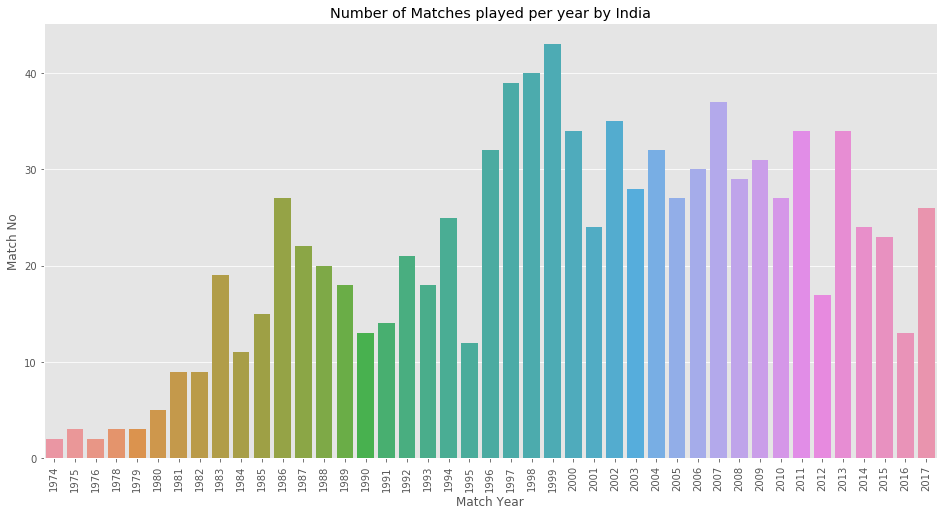

In [74]:
plt.figure(figsize=(16, 8))
sns.barplot(x = 'Match Year', y='Match No', data=matches_per_year.sort_values(ascending=False, by='Match No'))
plt.title("Number of Matches played per year by India")
plt.xticks(rotation=90)
plt.show()

- Team India started playing cricket from 1974 and from there we can see the growth of the matches played per year.
- In 1974 and 1976 india played only two matches, because it was the starting the era of indian team.
- In 1999 Indian team played more matches than any other year till 2017

In [75]:
wins_per_year = pd.DataFrame(india[india['Winner'] == 'India'].groupby('Match Year').agg('count')[['Winner']])
wins_per_year['Year'] = wins_per_year.index
wins_per_year = wins_per_year.reset_index(drop=True)
wins_per_year

,Winner,Year
0,1,1975
1,1,1978
2,3,1980
3,1,1981
4,5,1982
5,9,1983
6,2,1984
7,9,1985
8,12,1986
9,12,1987


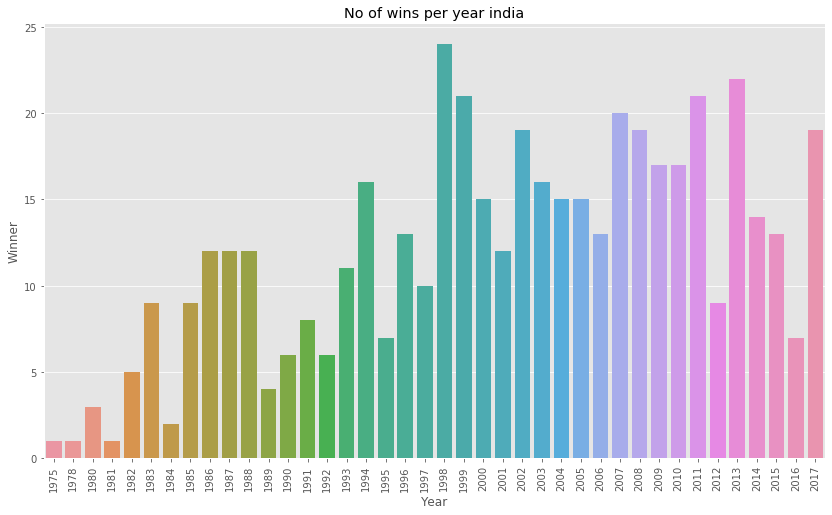

In [76]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Year', y='Winner', data=wins_per_year.sort_values(by='Winner', ascending=False))
plt.title('No of wins per year india')
plt.xticks(rotation=90)
plt.show()

- This infographic shows that in 1975 team india won least matches the reason is indian team only played 3 matches and out of that won 1 match
- In 1998 indian team most matches 

In [77]:
#Concatinating matches_per_year and wins_per_year dataframe for calculating the winning percentange
merged_df = pd.merge(matches_per_year, wins_per_year, how='inner', left_on='Match Year', right_on='Year')
merged_df = merged_df.rename(columns = {'Match No': 'Total Matches', 'Winner' : 'Total Wins'})
merged_df = merged_df.drop(['Match Year'], axis=1)

In [78]:
merged_df.head()

,Total Matches,Total Wins,Year
0,3,1,1975
1,3,1,1978
2,5,3,1980
3,9,1,1981
4,9,5,1982


In [79]:
#Calculate winning percentage of india and saving it in new column Win %
merged_df['Win %'] = round(100 * (merged_df['Total Wins'] / merged_df['Total Matches']), 2)

In [80]:
merged_df.tail(10)

,Total Matches,Total Wins,Year,Win %
30,29,19,2008,65.52
31,31,17,2009,54.84
32,27,17,2010,62.96
33,34,21,2011,61.76
34,17,9,2012,52.94
35,34,22,2013,64.71
36,24,14,2014,58.33
37,23,13,2015,56.52
38,13,7,2016,53.85
39,26,19,2017,73.08


[]

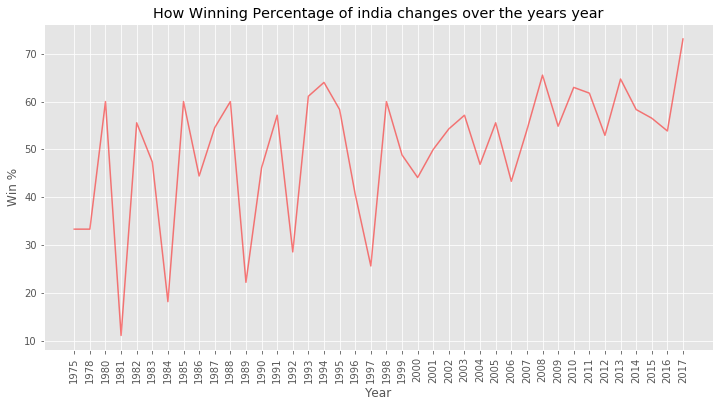

In [81]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Win %', data=merged_df, palette="tab10", color='r', alpha=0.5)
plt.title('How Winning Percentage of india changes over the years year')
plt.xticks(rotation=90)
plt.plot()

- As we can clearly see team India's performance is flactuating years by years. One year performance goes high and next year performance again came down.
  But, after year 1998 we can clearly see the growth of the indian team and by 2017 it chages to 73%.
- It will be fun to see, what are the factors that affect this bad performance of team india in 90's?